<a href="https://colab.research.google.com/github/shalujha/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
!wget https://www.dropbox.com/s/hsghah8yh0fa552/Heart_Disease_Dataset.zip?dl=0

--2021-02-10 08:33:09--  https://www.dropbox.com/s/hsghah8yh0fa552/Heart_Disease_Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hsghah8yh0fa552/Heart_Disease_Dataset.zip [following]
--2021-02-10 08:33:09--  https://www.dropbox.com/s/raw/hsghah8yh0fa552/Heart_Disease_Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d017a2c1658b02cbf15eb95f6.dl.dropboxusercontent.com/cd/0/inline/BIoXYNz6HVVilgXP4bejaIhoBkc5AAefQSZkXRc7JfoebAUkgEwt6HyROCwjIl76ONloKgZRYxqTsgGRtY-Uca1HpNCRFIUmXoE2-Q8aJw7J7pqmKLFYtKdLM1125iS3MLI/file# [following]
--2021-02-10 08:33:09--  https://uc4d017a2c1658b02cbf15eb95f6.dl.dropboxusercontent.com/cd/0/inline/BIoXYNz6HVVilgXP4bejaIhoBkc5AAefQSZkXRc7JfoebAUkgEwt6HyROCwjIl76ONl

In [140]:
!unzip 'Heart_Disease_Dataset.zip?dl=0' -d "data/"

Archive:  Heart_Disease_Dataset.zip?dl=0
replace data/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,plot_confusion_matrix
import numpy as np
from sklearn.utils import shuffle

In [179]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [180]:
df=pd.read_csv('/content/data/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [182]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X.shape,Y.shape)

(303, 13) (303,)


In [183]:
X,Y=shuffle(X,Y)

In [184]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [185]:
dt=DecisionTreeClassifier(criterion='gini',random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

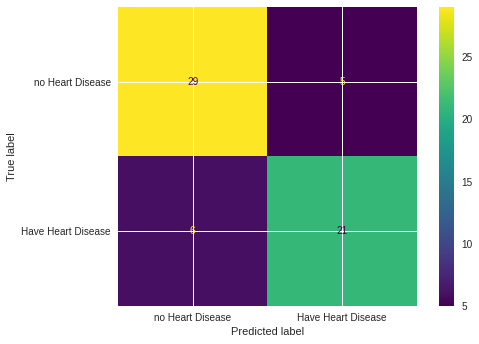

In [186]:
plot_confusion_matrix(dt,X_test,Y_test,display_labels=['no Heart Disease','Have Heart Disease'])

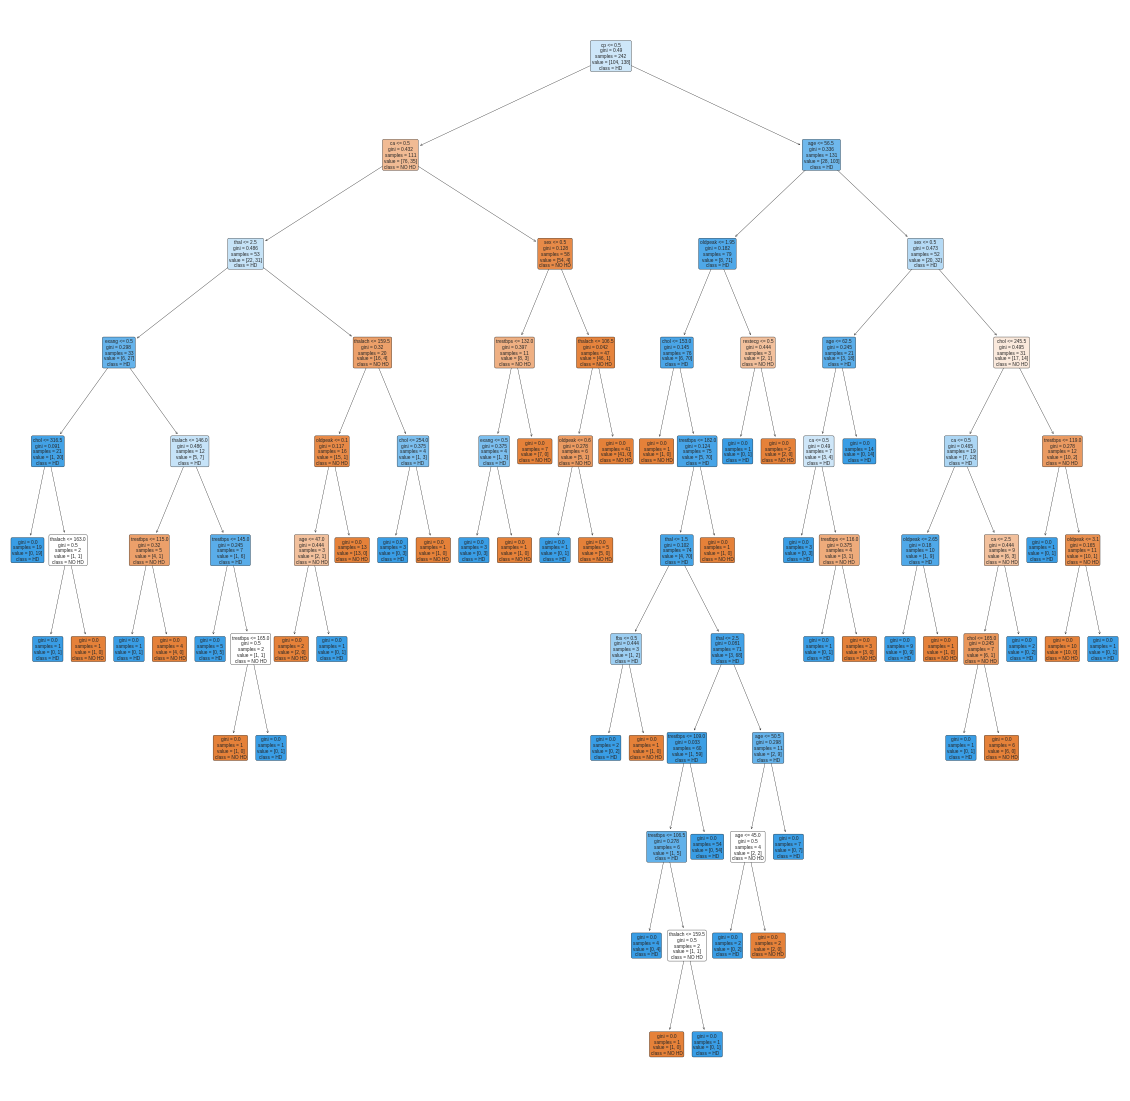

In [187]:
plt.figure(figsize=(20,20))
plot_tree(dt,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          class_names=['NO HD','HD']
          )
plt.show()

In [188]:
# so model has got overfit :
print(dt.score(X_train,Y_train))
print(dt.score(X_test,Y_test))

1.0
0.819672131147541


In [189]:
# lets do cost complexity pruning to resolve this:
path=dt.cost_complexity_pruning_path(X_train,Y_train)
alphas=path['ccp_alphas'][:-1]
print(alphas)

[0.         0.00270891 0.00354191 0.00387397 0.00393546 0.00404431
 0.00462884 0.00550964 0.00619835 0.00619835 0.00619835 0.00661157
 0.00688705 0.00708383 0.00720055 0.00743802 0.00752656 0.00823877
 0.00824551 0.0094451  0.00950234 0.0125     0.01257068 0.01313802
 0.01701524 0.02080745 0.0393292  0.06092481]


In [190]:
train_acc=[]
test_acc=[]
for alpha in alphas:
  dt=DecisionTreeClassifier(ccp_alpha=alpha)
  dt.fit(X_train,Y_train)
  train_acc.append(dt.score(X_train,Y_train))
  test_acc.append(dt.score(X_test,Y_test))

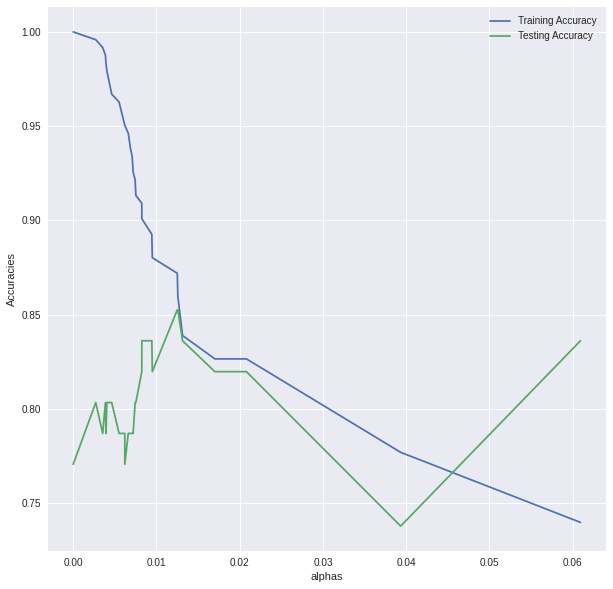

In [191]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.plot(alphas,train_acc,label='Training Accuracy')
plt.plot(alphas,test_acc,label='Testing Accuracy')
plt.xlabel('alphas')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [192]:
print(test_acc[np.argmax(test_acc)])

0.8524590163934426


In [193]:
best_alpha=alphas[np.argmax(test_acc)]
print(best_alpha)

0.012499999999999992


In [194]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))
print(dt.score(X_test,Y_test))

0.871900826446281
0.8524590163934426


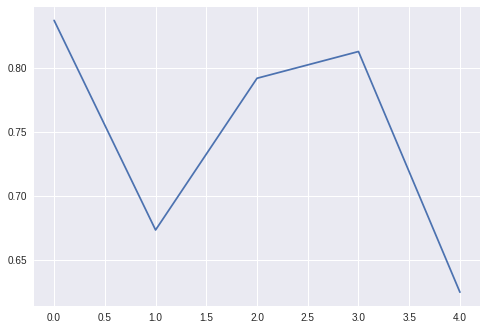

In [195]:
# as we can see, this value of alpha is not best when training and test are different:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
scores=cross_val_score(dt,X_train,Y_train,cv=5)
plt.plot(scores)

In [202]:
cv_scores=[]
for alpha in alphas:
  dt=DecisionTreeClassifier(ccp_alpha=alpha,random_state=45)
  cv_scores.append(np.mean(cross_val_score(dt,X,Y,cv=5)))
print(len(cv_scores))
print(cv_scores[0])

28
0.7425136612021859


In [203]:
best_alpha_after_cross_val=alphas[np.argmax(cv_scores)]
print(best_alpha_after_cross_val)

0.009445100354191261


In [204]:
pruned_dt=DecisionTreeClassifier(ccp_alpha=best_alpha_after_cross_val)
pruned_dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.009445100354191261, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [205]:
pruned_dt.score(X_test,Y_test)

0.8360655737704918

In [206]:
pruned_dt.score(X_train,Y_train)

0.8925619834710744

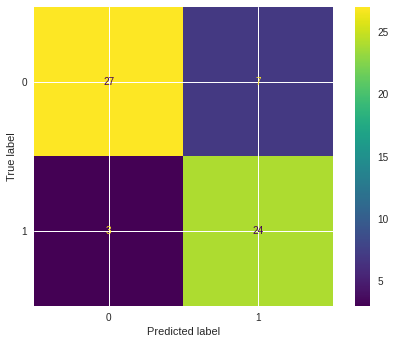

In [207]:
plot_confusion_matrix(pruned_dt,X_test,Y_test)

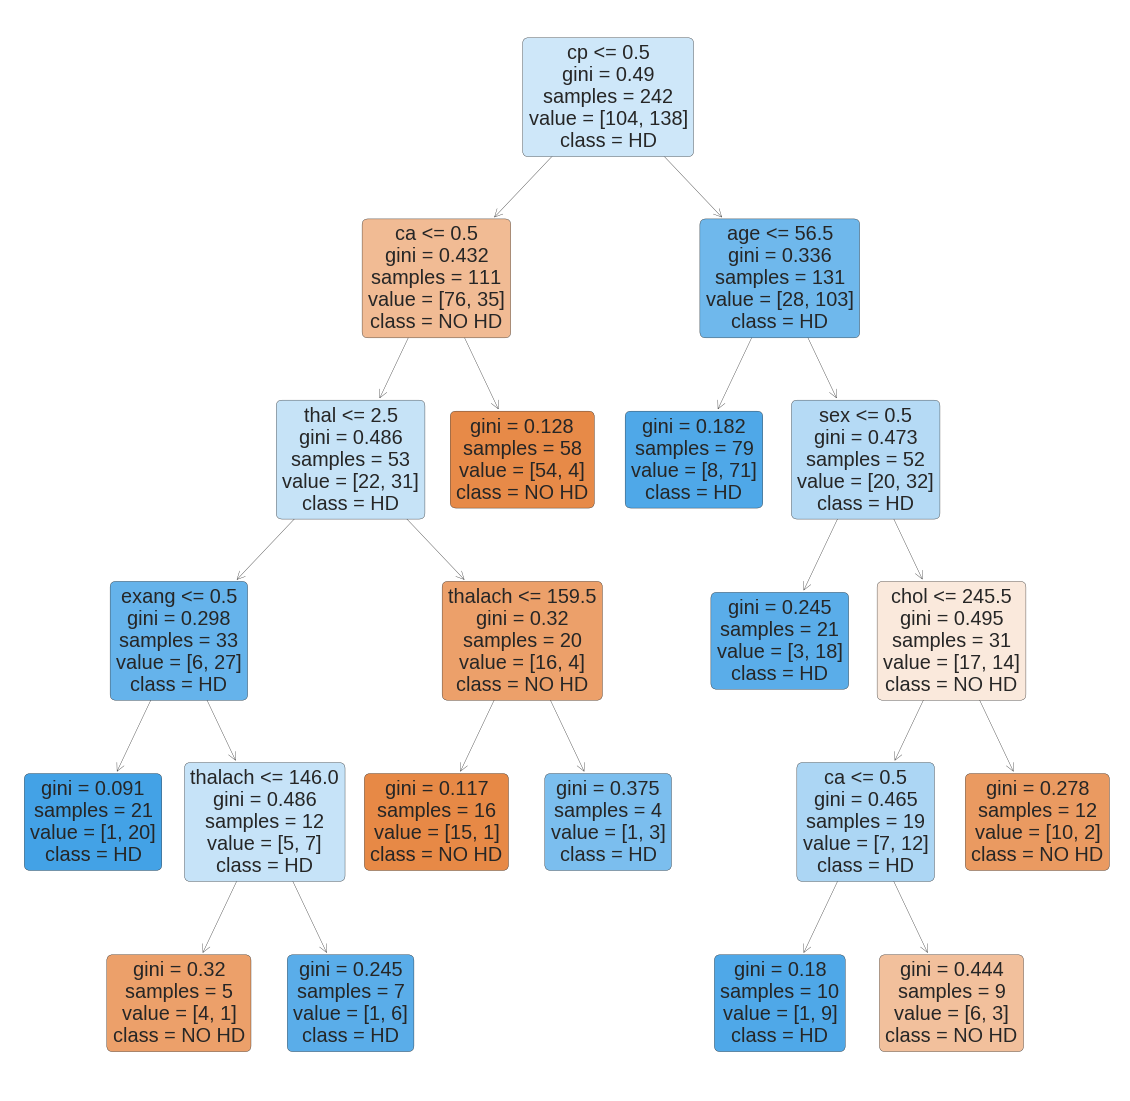

In [208]:
plt.figure(figsize=(20,20))
plot_tree(pruned_dt,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          class_names=['NO HD','HD']
          )
plt.show()